# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
%pip install citipy

  Using cached citipy-0.0.6.tar.gz (675 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for kdtree>=0.12 from https://files.pythonhosted.org/packages/00/3d/bd727d025b1706798aae14da3f69fc7d5a8639dc9e0eba37c7dcd43eb03e/kdtree-0.16-py2.py3-none-any.whl.metadata
Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=2a6ccc05253e7bed32d860d4df45d07e4c031a4ee65ecde1f0c39f6625469e63
  Stored in directory: c:\users\rober\appdata\local\pip\cache\wheels\4b\b5\88\49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | al-`ula
City not found. Skipping...
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | palikir - national government center
Processing Record 6 of Set 1 | bukama
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | bathsheba
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | kasane
Processing Record 12 of Set 1 | witu
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | prainha
Processing Record 15 of Set 1 | sarioglan
Processing Record 16 of Set 1 | nemuro
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | christchurch


Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#print(city_data_df)
# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,9.37,63,82,1.10,RU,1718322203
1,lebu,-37.6167,-73.6500,11.52,94,80,4.22,CL,1718322196
2,margaret river,-33.9500,115.0667,10.05,89,3,3.69,AU,1718322204
3,palikir - national government center,6.9248,158.1611,27.41,89,100,5.14,FM,1718322301
4,bukama,-9.2000,25.8500,19.05,51,0,1.12,CD,1718322302


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,9.37,63,82,1.10,RU,1718322203
1,lebu,-37.6167,-73.6500,11.52,94,80,4.22,CL,1718322196
2,margaret river,-33.9500,115.0667,10.05,89,3,3.69,AU,1718322204
3,palikir - national government center,6.9248,158.1611,27.41,89,100,5.14,FM,1718322301
4,bukama,-9.2000,25.8500,19.05,51,0,1.12,CD,1718322302


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

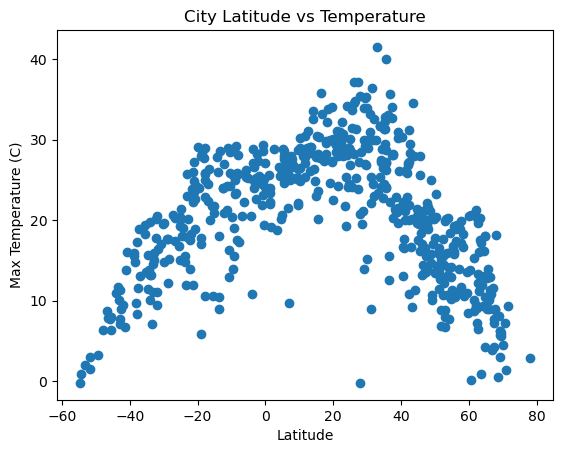

In [28]:
# Build scatter plot for latitude vs. temperature
title = "City Latitude vs Temperature"

x_label = "Latitude"
y_label = "Max Temperature (C)"

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

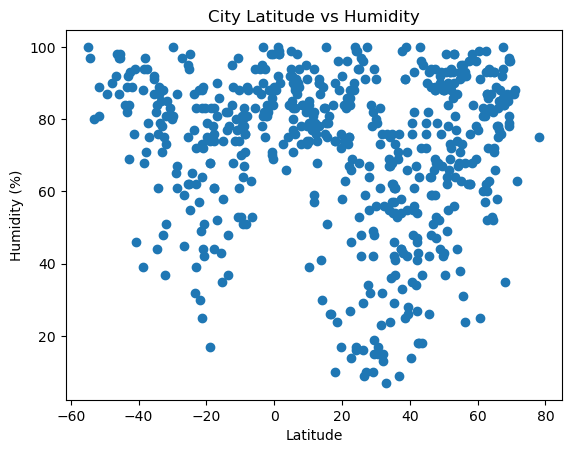

In [29]:
# Build scatter plot for latitude vs. humidity
title = "City Latitude vs Humidity"

x_label = "Latitude"
y_label = "Humidity (%)"

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

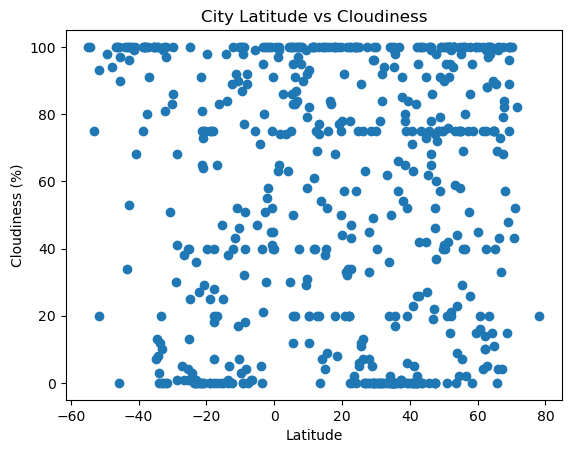

In [31]:
# Build scatter plot for latitude vs. Cloudiness
title = "City Latitude vs Cloudiness"

x_label = "Latitude"
y_label = "Cloudiness (%)"

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

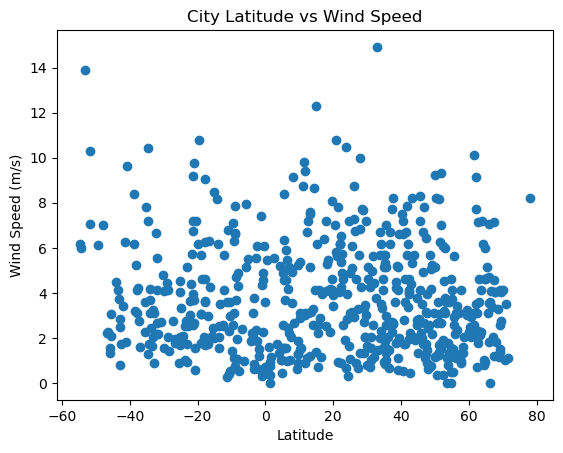

In [32]:
# Build scatter plot for latitude vs. Wind Speed
title = "City Latitude vs Wind Speed"

x_label = "Latitude"
y_label = "Wind Speed (m/s)"

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def regression(x, y, x_label, y_label, annotate_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    # Annotation coordinates are out of bounds using the lessons regression code
    plt.annotate(line_eq,annotate_coords,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,9.37,63,82,1.10,RU,1718322203
3,palikir - national government center,6.9248,158.1611,27.41,89,100,5.14,FM,1718322301
6,bathsheba,13.2167,-59.5167,28.34,78,20,5.14,BB,1718322302
13,sarioglan,39.0769,35.9667,19.69,55,52,0.59,TR,1718322303
14,nemuro,43.3236,145.5750,9.18,96,100,5.33,JP,1718322225


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lebu,-37.6167,-73.6500,11.52,94,80,4.22,CL,1718322196
2,margaret river,-33.9500,115.0667,10.05,89,3,3.69,AU,1718322204
4,bukama,-9.2000,25.8500,19.05,51,0,1.12,CD,1718322302
5,port-aux-francais,-49.3500,70.2167,3.25,87,98,6.13,TF,1718322192
7,port elizabeth,-33.9180,25.5701,13.16,87,0,3.09,ZA,1718322192


###  Temperature vs. Latitude Linear Regression Plot

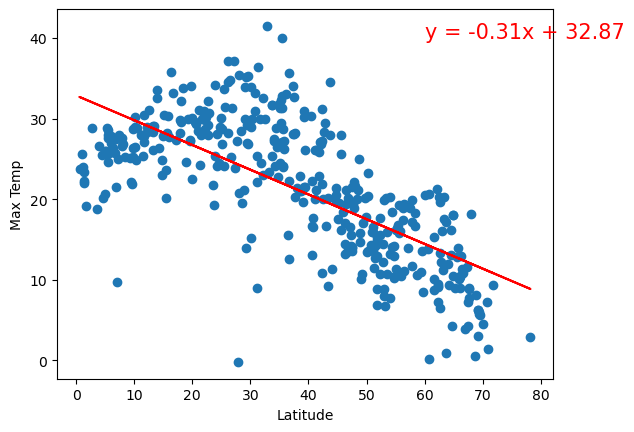

In [49]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

# regression(x, y, x_label, y_label)
regression(x, y, 'Latitude', 'Max Temp', (60, 40))

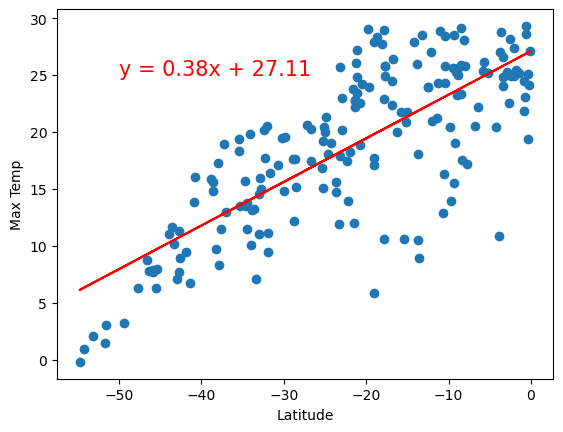

In [50]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

# regression(x, y, x_label, y_label)
regression(x, y, 'Latitude', 'Max Temp', (-50, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

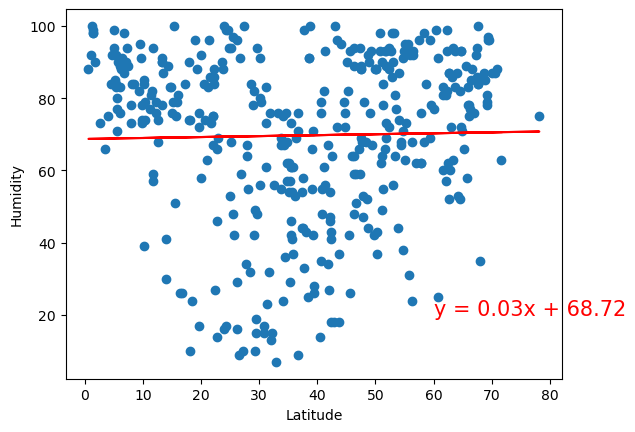

In [53]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

# regression(x, y, x_label, y_label)
regression(x, y, 'Latitude', 'Humidity', (60, 20))

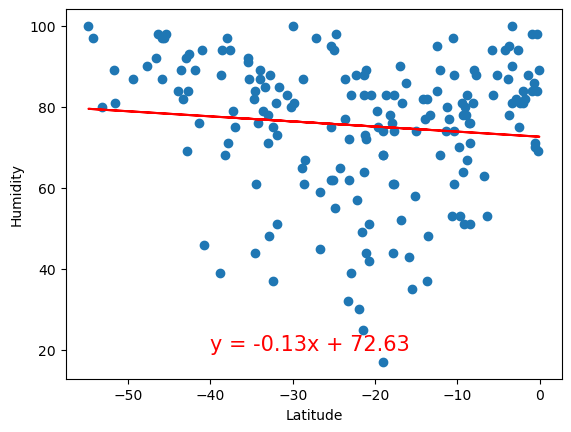

In [51]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

# regression(x, y, x_label, y_label)
regression(x, y, 'Latitude', 'Humidity', (-40, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

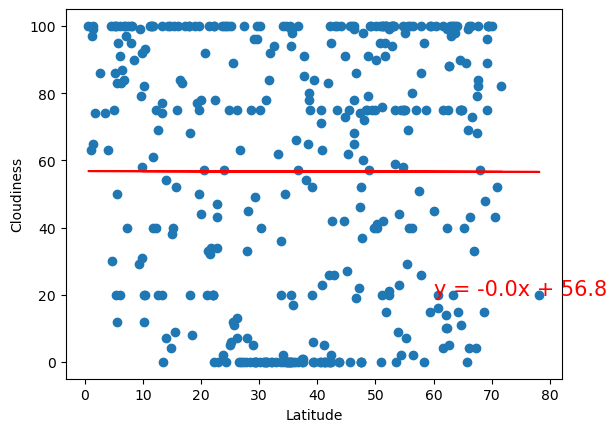

In [54]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

# regression(x, y, x_label, y_label)
regression(x, y, 'Latitude', 'Cloudiness', (60, 20))

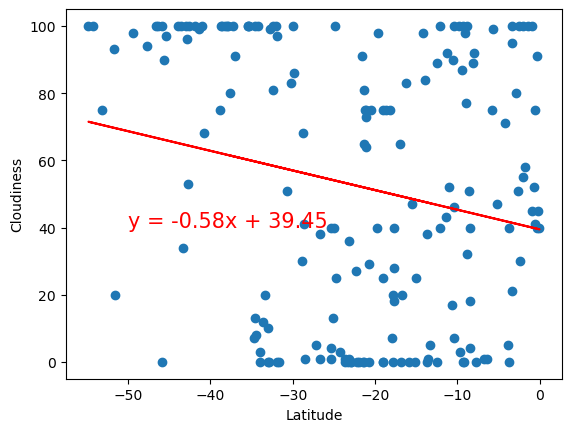

In [57]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

# regression(x, y, x_label, y_label)
regression(x, y, 'Latitude', 'Cloudiness', (-50, 40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

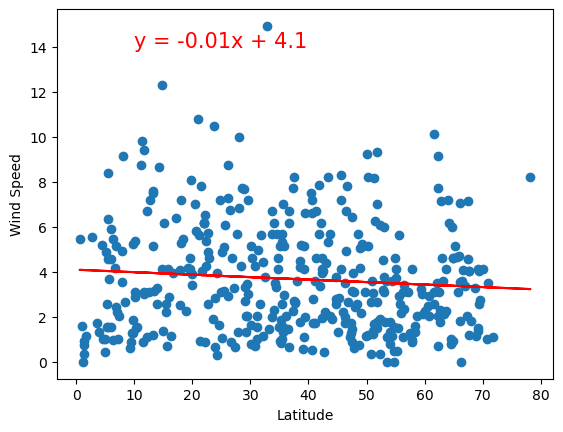

In [60]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

# regression(x, y, x_label, y_label)
regression(x, y, 'Latitude', 'Wind Speed', (10, 14))

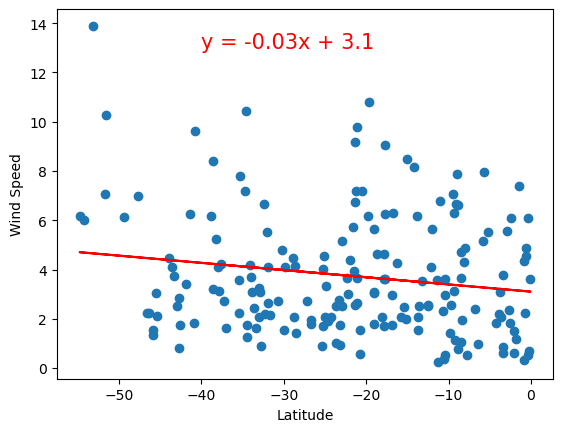

In [63]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

# regression(x, y, x_label, y_label)
regression(x, y, 'Latitude', 'Wind Speed', (-40, 13))

**Discussion about the linear relationship:** YOUR RESPONSE HERE